# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



**Import Libarary**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

**Import the csv**

In [286]:
df= pd.read_csv('pet_supplies_2212.csv')
df.head(5)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


## Task 1



**Check data types and description of each column**

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [288]:
df.describe()

,product_id,sales,rating,repeat_purchase
count,1500.000000,1500.000000,1350.000000,1500.000000
mean,750.500000,996.597847,4.991111,0.604000
std,433.157015,323.952676,1.559755,0.489228
min,1.000000,286.940000,1.000000,0.000000
25%,375.750000,747.420000,4.000000,0.000000
50%,750.500000,1000.830000,5.000000,1.000000
75%,1125.250000,1158.157500,6.000000,1.000000
max,1500.000000,2255.960000,9.000000,1.000000


In [289]:
for i in ['category','animal','size','rating','repeat_purchase']:
    print(f'{i}: ',df[i].unique() )

category:  ['Food' 'Housing' 'Medicine' 'Toys' 'Equipment' 'Accessory' '-']
animal:  ['Bird' 'Dog' 'Cat' 'Fish']
size:  ['large' 'MEDIUM' 'medium' 'small' 'Small' 'Large' 'SMALL' 'Medium'
 'LARGE']
rating:  [ 7.  6.  5.  4.  8.  1.  3. nan  2.  9.]
repeat_purchase:  [1 0]


We can see the category column, rating column contain missing data

**Check NaN value**

In [290]:
df.isna().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

Only 'rating' column contain NaN values with total of 150 values

**Match the data types with the description**

As we can see, the type of columns 'price' and 'rating' do not match the given description. The price column  must be float and rating column must be integer.

In [291]:
#change column value to numeric value
df['price']=pd.to_numeric(df['price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'],errors='coerce')
# Replace Nan values of rating column with 0
df['rating'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)
# Convert the rating column to integer
df['rating'] = df['rating'].astype('int64')

I will check the data type again

In [292]:
df.dtypes

product_id           int64
category            object
animal              object
size                object
price              float64
sales              float64
rating               int64
repeat_purchase      int64
dtype: object

I will check data nan value

In [293]:
df.isna().sum()

product_id           0
category             0
animal               0
size                 0
price              150
sales                0
rating               0
repeat_purchase      0
dtype: int64

As we see, the origin data type of price is string, after changing it in to float, it appear that there is some value can not be converted into float, so I listed it as missing value, the total numbers is 150 missing values for the price column.
I will start to match change the data to match with the description.

***To sum up, I only need to handle with missing values of 'category', 'size' and 'price' column .I will change the data to match with the description.***

In [294]:
#Replace missing value of 'category' with 'Unknown'
df['category'].replace('-','Unknown',inplace=True)
#Replace value of 'size' with correct word form
df['size']= df['size'].str.lower().str.title()
#Replace missing value of 'price' with overall median 'price'
df['price'].fillna(df['price'].median(),inplace=True)

Check the data information once again to make sure everything is correct

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   float64
 5   sales            1500 non-null   float64
 6   rating           1500 non-null   int64  
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 93.9+ KB


In [296]:
for i in ['category','animal','size','rating','repeat_purchase']:
    print(f'{i}: ',df[i].unique() )

category:  ['Food' 'Housing' 'Medicine' 'Toys' 'Equipment' 'Accessory' 'Unknown']
animal:  ['Bird' 'Dog' 'Cat' 'Fish']
size:  ['Large' 'Medium' 'Small']
rating:  [7 6 5 4 8 1 3 0 2 9]
repeat_purchase:  [1 0]


Now, everything matched with the description

## Task 2

**Plot the 'repeat_purchase' column**

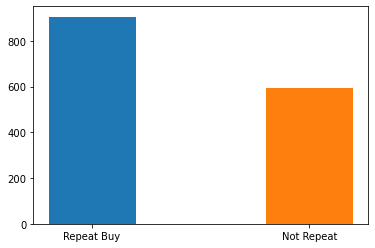

In [297]:
a=df['repeat_purchase'].value_counts()
plt.bar(0,a[1],0.4)
plt.bar(1,a[0],0.4)
plt.xticks([0,1],['Repeat Buy','Not Repeat'])
plt.show()

We can observe that, the number of products was bought repeatedly with more than 900 products is half as much higher than the one-time buy product with just be near to 600 products.

**Plot the 'repeat_purchase' column, devided by 'category'**

In [298]:
#Group the category by the numbers of repeat_purchase
repeat_buy = df.groupby('category')['repeat_purchase'].sum()
repeat_buy

category
Accessory     70
Equipment    221
Food         151
Housing      152
Medicine     153
Toys         145
Unknown       14
Name: repeat_purchase, dtype: int64

In [308]:
#Group the category by the numbers of non repeat_purchase
no_repeat = df['category'].value_counts() - repeat_buy
no_repeat

Accessory     56
Equipment    149
Food         109
Housing       75
Medicine      84
Toys         110
Unknown       11
dtype: int64

In [300]:
#Concatenate two table
repeat_buy_details=pd.concat([repeat_buy,no_repeat],axis=1)
repeat_buy_details

,repeat_purchase,0
Accessory,70,56
Equipment,221,149
Food,151,109
Housing,152,75
Medicine,153,84
Toys,145,110
Unknown,14,11


In [301]:
#Change column name 
repeat_buy_details=repeat_buy_details.rename({'repeat_purchase':'Repeat Buy',0:'Not Repeat'},axis=1)
repeat_buy_details

,Repeat Buy,Not Repeat
Accessory,70,56
Equipment,221,149
Food,151,109
Housing,152,75
Medicine,153,84
Toys,145,110
Unknown,14,11


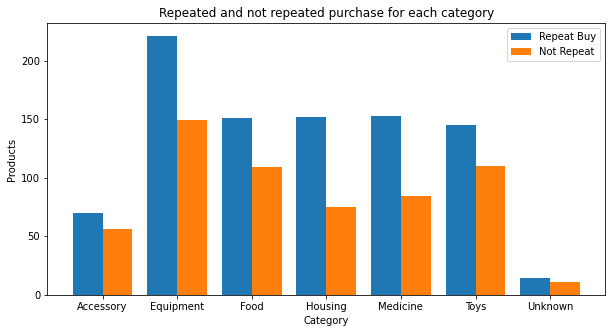

In [302]:
#Plot the column
cols, rows = repeat_buy_details.columns,repeat_buy_details.index
RepeatBuy=repeat_buy_details['Repeat Buy']
NotRepeat=repeat_buy_details['Not Repeat']
X_axis = np.arange(len(rows))
plt.figure(figsize=(10, 5))
plt.bar(X_axis - 0.2, RepeatBuy, 0.4, label = 'Repeat Buy')
plt.bar(X_axis + 0.2, NotRepeat, 0.4, label = 'Not Repeat')
plt.xticks(X_axis,rows)
plt.title('Repeated and not repeated purchase for each category')
plt.xlabel('Category')
plt.ylabel('Products')
plt.legend(cols)
plt.show()

We can see that, the Equipment category has the most observations along all the categories with more than 200 products.

The observations is seem to balanced for Food, Housing, Medicine and Toys category with around 150 products. Except for Accessory with only about 75 products. But to compare the Repeat Buy of Accessory, Toys, Food and Equipment category seem to be just much more for a half of Not Repeat whule Housing and Medicine is twice much more.

## Task 3

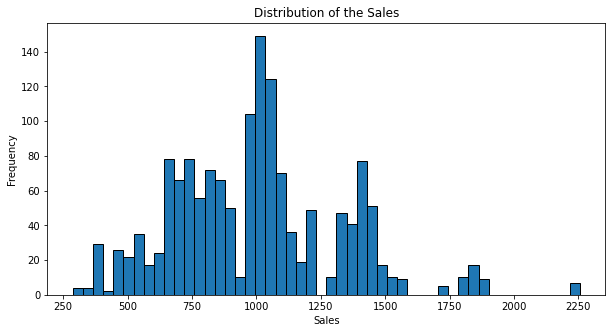

In [303]:
plt.figure(figsize=(10, 5))
plt.hist(df['sales'], bins=50 , edgecolor='black')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of the Sales')
plt.show()

We can see that, the distribution of the Sales is mostly range around 1000, from 650 to 900 and around 1400, while the products usually have the sale around 1000 with about 400 products. Just some products have the sales for more than 1500 and below 300.

## Task 4

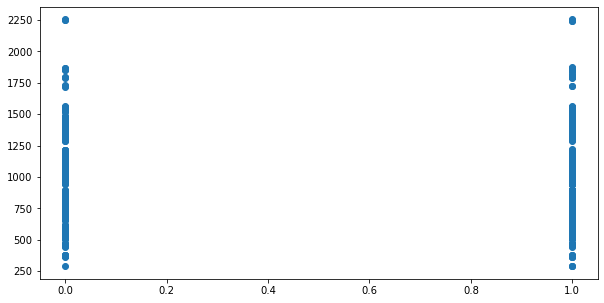

In [304]:
plt.figure(figsize=(10, 5))
plt.scatter(df['repeat_purchase'],df['sales'])

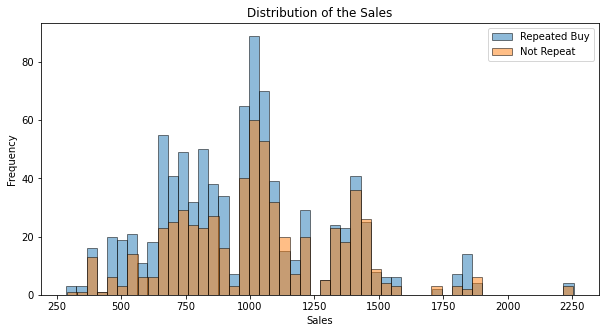

In [305]:
df1=df[df['repeat_purchase']==0]
df2=df[df['repeat_purchase']==1]
plt.figure(figsize=(10, 5))
plt.hist(df2['sales'], bins=50 ,alpha=0.5, edgecolor='black', label='Repeated Buy')
plt.hist(df1['sales'], bins=50 ,alpha=0.5, edgecolor='black',label='Not Repeat')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of the Sales')
plt.legend()
plt.show()

We can see that, it seem to be there are no relationships between the sales and repeated purchase, that the distribution of sale between sales for products that be repeated buy and not be repeated in the scatter plot look the same. But in the histogram the frequency of sales for Repeated Buy higher a little bit.

I will check the correlation for more clear:

In [306]:
df['sales'].corr(df['repeat_purchase'])

-0.07943499269258511

We can see that, there is nearly  no correlation between sales and repeat purchase

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam